In [1]:
# Data Loading 
import numpy as np
import pandas as pd
from tqdm import tqdm

base_path = './MLEnd/deception/MLEndDD_stories_small/'
MLEND_df = pd.read_csv('./MLEnd/deception/MLEndDD_story_attributes_small.csv').set_index('filename')

files = [base_path + file for file in MLEND_df.index]

print(f"We have {len(files)} audio files in the dataset.")
display(MLEND_df.head())

#Langauge and Data Distribution
language_counts = MLEND_df['Language'].value_counts()
language_df = pd.DataFrame(language_counts).transpose()
language_df['Sum'] = language_counts.sum()

story_type_counts = MLEND_df['Story_type'].value_counts()

print("Languages narrated in the dataset are:")
display(language_df)
print(story_type_counts)

We have 100 audio files in the dataset.


,Language,Story_type
filename,,
00001.wav,Hindi,deceptive_story
00002.wav,English,true_story
00003.wav,English,deceptive_story
00004.wav,Bengali,deceptive_story
00005.wav,English,deceptive_story


Languages narrated in the dataset are:


Language,English,Hindi,Arabic,"Chinese, Mandarin",Marathi,Bengali,Kannada,French,Russian,Portuguese,Spanish,Swahilli,Telugu,Korean,Cantonese,Italian,Sum
count,78,4,3,2,2,1,1,1,1,1,1,1,1,1,1,1,100


Story_type
deceptive_story    50
true_story         50
Name: count, dtype: int64


In [2]:
import librosa
import pandas as pd
from tqdm import tqdm

metadata_rows = []
chunk_rows = []

for file_id in tqdm(MLEND_df.index):
    file_path = base_path + file_id
    story_type = MLEND_df.loc[file_id, 'Story_type']

    audio_data, original_sr = librosa.load(file_path, sr=None)

    # Total duration and chunk size
    total_duration = len(audio_data) / original_sr
    chunk_size = int(30 * original_sr)  # 30 seconds in samples

    # Split the audio into chunks
    chunks = [audio_data[i:i + chunk_size] for i in range(0, len(audio_data), chunk_size)]
    valid_chunks = [chunk for chunk in chunks if len(chunk) == chunk_size]

    # Metadata
    metadata_rows.append({"File ID": file_id,
                          "Total Duration (s)": total_duration,
                          "Total Chunks": len(chunks),
                          "Valid Chunks": len(valid_chunks),
                          "Story Type": story_type,
                          "Original Sample Rate": original_sr})

    # Valid Chunks
    for i, chunk in enumerate(valid_chunks):
        chunk_rows.append({"File ID": file_id,
                           "Chunk ID": f"{file_id}_chunk{i + 1}",
                           "Chunk Data": chunk,
                           "Story Type": story_type,
                           "Sample Rate": original_sr})

# Convert to DataFrames
metadata_df = pd.DataFrame(metadata_rows)
chunks_df = pd.DataFrame(chunk_rows)

# Display Results
print("Summary of Audio Files:")
display(metadata_df)
print("\nSummary of Valid Audio Chunks:")
display(chunks_df)

# Summary Statistics
print("\nSummary Statistics:")
print(f"Total Files Processed: {len(metadata_df)}")
print(f"Total Chunks Created: {metadata_df['Total Chunks'].sum()}")
print(f"Total Valid Chunks (30s): {metadata_df['Valid Chunks'].sum()}")
print(f"Unique Sample Rates: {metadata_df['Original Sample Rate'].unique()}")

# True and Deceptive Story Distribution
valid_chunk_labels = chunks_df['Story Type'].value_counts(normalize=True)
print("\nCount and Percentage of True and Deceptive Stories from Valid Chunks (30s):")
for story_type, percentage in valid_chunk_labels.items():
    count = chunks_df['Story Type'].value_counts()[story_type]
    print(f"{story_type}: {count} chunks ({percentage * 100:.2f}%)")



100%|██████████| 100/100 [00:06<00:00, 15.59it/s]

Summary of Audio Files:


,File ID,Total Duration (s),Total Chunks,Valid Chunks,Story Type,Original Sample Rate
0,00001.wav,122.167256,5,4,deceptive_story,44100
1,00002.wav,125.192018,5,4,true_story,44100
2,00003.wav,162.984127,6,5,deceptive_story,44100
3,00004.wav,121.681270,5,4,deceptive_story,44100
4,00005.wav,134.189751,5,4,deceptive_story,44100
...,...,...,...,...,...,...
95,00096.wav,111.512063,4,3,deceptive_story,44100
96,00097.wav,185.731224,7,6,true_story,44100
97,00098.wav,128.252766,5,4,deceptive_story,44100
98,00099.wav,132.412562,5,4,true_story,44100



Summary of Valid Audio Chunks:


,File ID,Chunk ID,Chunk Data,Story Type,Sample Rate
0,00001.wav,00001.wav_chunk1,"[1.5258789e-05, 1.5258789e-05, 3.0517578e-05, ...",deceptive_story,44100
1,00001.wav,00001.wav_chunk2,"[0.027450562, 0.026519775, 0.025390625, 0.0242...",deceptive_story,44100
2,00001.wav,00001.wav_chunk3,"[-0.00091552734, -0.0011138916, -0.0013122559,...",deceptive_story,44100
3,00001.wav,00001.wav_chunk4,"[6.1035156e-05, 9.1552734e-05, 7.6293945e-05, ...",deceptive_story,44100
4,00002.wav,00002.wav_chunk1,"[0.0008239746, 0.0008239746, 0.00088500977, 0....",true_story,44100
...,...,...,...,...,...
415,00099.wav,00099.wav_chunk4,"[-3.0517578e-05, -3.0517578e-05, -3.0517578e-0...",true_story,44100
416,00100.wav,00100.wav_chunk1,"[-0.00018310547, -0.00015258789, -6.1035156e-0...",deceptive_story,44100
417,00100.wav,00100.wav_chunk2,"[0.0004272461, 0.00048828125, 0.0005187988, 0....",deceptive_story,44100
418,00100.wav,00100.wav_chunk3,"[6.1035156e-05, 0.0, -6.1035156e-05, -6.103515...",deceptive_story,44100



Summary Statistics:
Total Files Processed: 100
Total Chunks Created: 520
Total Valid Chunks (30s): 420
Unique Sample Rates: [44100 48000]

Count and Percentage of True and Deceptive Stories from Valid Chunks (30s):
true_story: 219 chunks (52.14%)
deceptive_story: 201 chunks (47.86%)


Feature Extraction

In [3]:
# import numpy as np
# import librosa
# import pandas as pd
# from tqdm import tqdm

# def extract_features_and_labels(chunks_df, scale_audio=True, win_len=0.02):
    
#     features, labels, file_ids = [], [], []

#     for _, row in tqdm(chunks_df.iterrows(), total=len(chunks_df)):
#         file_id = row["File ID"]
#         audio_data = np.array(row["Chunk Data"])
#         label = row["Story Type"]
#         sr = row["Sample Rate"]
        
#         # Scale amplitude
#         if scale_audio:
#             audio_data /= np.max(np.abs(audio_data))

#         # Power
#         power = np.mean(audio_data**2)

#         # Pitch (Mean & Std)
#         p = win_len * sr
#         frame_length = int(2**int(p - 1).bit_length()) 
#         hop_length = frame_length // 2
#         f0, voiced_flag, _ = librosa.pyin(y=audio_data, fmin=80, fmax=450, 
#                                           sr=sr, frame_length=frame_length, hop_length=hop_length)
#         pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
#         pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        
#         # Voice Fraction
#         voiced_fraction = np.mean(voiced_flag)

#         # Append features, label, and file ID
#         features.append([power, pitch_mean, pitch_std, voiced_fraction])
#         labels.append(0 if label == "true_story" else 1)
#         file_ids.append(file_id)

#     return np.array(features), np.array(labels), file_ids

# # Extract X and y
# X, y, file_ids = extract_features_and_labels(chunks_df)


In [4]:
# # Save features to a DataFrame for inspection and downstream processing
# features_df = pd.DataFrame({"File ID": file_ids,
#                             "Power": X[:, 0],
#                             "Pitch Mean": X[:, 1],
#                             "Pitch Std": X[:, 2],
#                             "Voiced Fraction": X[:, 3],
#                             "Label": y,})

# # Save extracted features
# features_df.to_csv("extracted_features.csv", index=False)
# print("Features saved to extracted_features.csv")

features_df = pd.read_csv("extracted_features.csv")
display(features_df)

,File ID,Power,Pitch Mean,Pitch Std,Voiced Fraction,Label
0,00001.wav,0.008703,239.750626,36.387706,0.641254,1
1,00001.wav,0.018345,229.985643,37.215370,0.667183,1
2,00001.wav,0.020830,225.808064,34.616300,0.648607,1
3,00001.wav,0.008324,246.217132,40.499477,0.676084,1
4,00002.wav,0.005698,107.144544,15.705212,0.481811,0
...,...,...,...,...,...,...
415,00099.wav,0.007010,115.061536,6.036951,0.497291,0
416,00100.wav,0.004277,116.499675,9.984560,0.220975,1
417,00100.wav,0.003567,114.244930,13.203138,0.234133,1
418,00100.wav,0.004407,114.183741,8.391459,0.234907,1


Train Valid Split

In [5]:
from sklearn.model_selection import train_test_split

# Split based on file IDs
unique_file_ids = features_df["File ID"].unique()
train_file_ids, test_file_ids = train_test_split(unique_file_ids, test_size=0.3, random_state=57)

# Create train and test df
train_features_df = features_df[features_df["File ID"].isin(train_file_ids)]
test_features_df = features_df[features_df["File ID"].isin(test_file_ids)]

# Extract Features and Labels (X, y)
X_train = train_features_df.drop(columns=["Label", "File ID"]).values
y_train = train_features_df["Label"].values
X_test = test_features_df.drop(columns=["Label", "File ID"]).values
y_test = test_features_df["Label"].values

# Confirm Split
print("Train Feature Distribution:")
print(f"There are a total {train_features_df.shape[0]} of 30s chunks from {train_features_df['File ID'].nunique()} audio files in the training set.")
print(train_features_df["Label"].value_counts(normalize=True).round(4))

print("\nTest Feature Distribution:")
print(f"There are a total {test_features_df.shape[0]} of 30s chunks from {test_features_df['File ID'].nunique()} audio files in the testing set.")
print(test_features_df["Label"].value_counts(normalize=True).round(4))


Train Feature Distribution:
There are a total 289 of 30s chunks from 70 audio files in the training set.
Label
0    0.519
1    0.481
Name: proportion, dtype: float64

Test Feature Distribution:
There are a total 131 of 30s chunks from 30 audio files in the testing set.
Label
0    0.5267
1    0.4733
Name: proportion, dtype: float64


In [6]:
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np
import pandas as pd

groups_train = train_features_df["File ID"].values  
n_splits = 5  # Number of cross-validation folds
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation splits
cv_splits = list(sgkf.split(X_train, y_train, groups=groups_train))

# Initialize accumulators for class distributions
train_class_dist_accum = pd.Series(dtype=float)
valid_class_dist_accum = pd.Series(dtype=float)

# Iterate over cv splits
for fold_idx, (train_idx, valid_idx) in enumerate(cv_splits):
    X_cv_train, X_cv_valid = X_train[train_idx], X_train[valid_idx]
    y_cv_train, y_cv_valid = y_train[train_idx], y_train[valid_idx]

    # Calculate class distributions 
    train_class_dist = pd.Series(y_cv_train).value_counts(normalize=True)
    valid_class_dist = pd.Series(y_cv_valid).value_counts(normalize=True)
    train_class_dist_accum = train_class_dist_accum.add(train_class_dist, fill_value=0)
    valid_class_dist_accum = valid_class_dist_accum.add(valid_class_dist, fill_value=0)

# Average class distributions
avg_train_class_dist = (train_class_dist_accum / n_splits).round(4)
avg_valid_class_dist = (valid_class_dist_accum / n_splits).round(4)

print("Average Class Distribution Across All Cross-Validation Folds:")
print(f"Class Distribution in Trainning Set: {avg_train_class_dist.to_dict()}")
print(f"Class Distibution in Validation Set: {avg_valid_class_dist.to_dict()}")



Average Class Distribution Across All Cross-Validation Folds:
Class Distribution in Trainning Set: {0: 0.5191, 1: 0.4809}
Class Distibution in Validation Set: {0: 0.5199, 1: 0.4801}


Models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Pipelines for each model
pipelines = {
    "LogisticRegression": Pipeline([("scaler", StandardScaler()),
                                    ("lr", LogisticRegression())]),

    "RandomForest": Pipeline([("scaler", StandardScaler()),  
                              ("rf", RandomForestClassifier(random_state=26))]),

    "GradientBoosting": Pipeline([("scaler", StandardScaler()),  
                                  ("gb", GradientBoostingClassifier(random_state=26))]),

    "SVM": Pipeline([("scaler", StandardScaler()),
                     ("svm", SVC())])
}

# Hyperparameters for each model
param_grids = {
    "LogisticRegression": {"lr__C": [0.1, 1, 10, 20, 30, 50, 100],
                           "lr__max_iter": [100, 200, 500]},

    "RandomForest": {"rf__n_estimators": [10, 20, 30, 50, 100, 200],
                     "rf__max_depth": [3, 5, 10, 20, 30]},

    "GradientBoosting": {"gb__n_estimators": [10, 20, 30, 50, 100],
                         "gb__max_depth": [3, 5, 7, 10, 20, 30],
                         "gb__learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]},

    "SVM": {"svm__C": [1, 3, 5, 10, 20],
            "svm__kernel": ["linear", "rbf"],
            "svm__gamma": ["scale", "auto"]
            }
}

# Scoring metric
scoring = make_scorer(f1_score)

# Use the precomputed cv_splits from StratifiedGroupKFold
custom_cv = [(train_idx, valid_idx) for train_idx, valid_idx in cv_splits]

results = []

# GridSearchCV
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grids[model_name],
                               scoring=scoring,
                               cv=custom_cv)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)

    train_f1 = f1_score(y_train, y_train_pred)
    valid_f1 = grid_search.best_score_  

    # Append results
    results.append({"Model": model_name,
                    "Best Params": grid_search.best_params_,
                    "Training F1 Score": train_f1,
                    "Validation F1 Score (Mean)": valid_f1})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
display(results_df)





Summary of Results:


,Model,Best Params,Training F1 Score,Validation F1 Score (Mean)
0,LogisticRegression,"{'lr__C': 1, 'lr__max_iter': 100}",0.472574,0.253167
1,RandomForest,"{'rf__max_depth': 10, 'rf__n_estimators': 10}",0.989170,0.353674
2,GradientBoosting,"{'gb__learning_rate': 0.2, 'gb__max_depth': 3,...",0.978417,0.427944
3,SVM,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke...",0.759124,0.375723


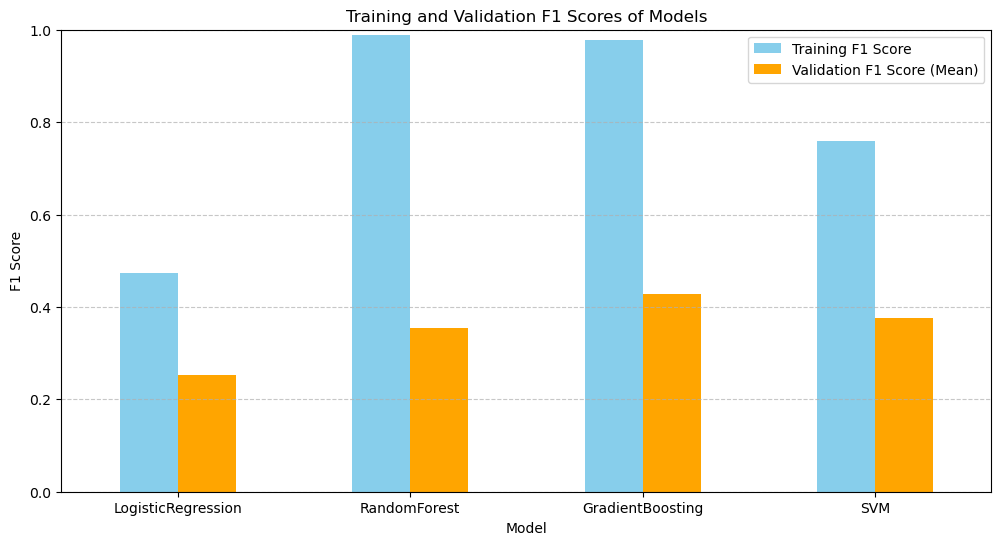

In [8]:
import matplotlib.pyplot as plt

# Plot bar chart for training and validation F1 scores
results_df.set_index("Model")[["Training F1 Score", "Validation F1 Score (Mean)"]].plot.bar(
    figsize=(12, 6), rot=0, color=["skyblue", "orange"]
)
plt.title("Training and Validation F1 Scores of Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [9]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Plot normalized confusion matrix for each model
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()

# for idx, row in results_df.iterrows():
#     model_name = row["Model"]
#     best_model = pipelines[model_name].set_params(**row["Best Params"]).fit(X_train, y_train)
    
#     # Predict on the validation set
#     y_valid_pred = best_model.predict(X_test)
    
#     # Confusion Matrix (normalized)
#     cm = confusion_matrix(y_test, y_valid_pred, labels=[0, 1], normalize='true')
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "Deceptive"])
#     disp.plot(ax=axes[idx], cmap="Blues", colorbar=False)
#     axes[idx].set_title(f"{model_name} Confusion Matrix (Normalized)")

# plt.tight_layout()
# plt.show()


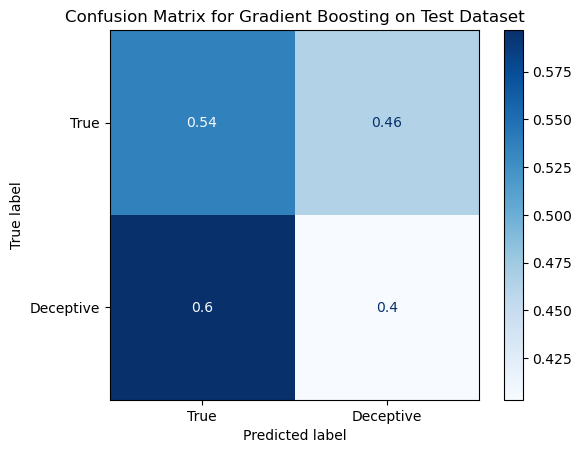

Test F1 Score: 0.4202


In [15]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
best_gb_params = results_df.loc[results_df["Model"] == "GradientBoosting", "Best Params"].values[0]
best_gb_model = pipelines["GradientBoosting"].set_params(**best_gb_params)
best_gb_model.fit(X_train, y_train)  
y_test_pred = best_gb_model.predict(X_test)  

# Performance Metrics
test_f1 = f1_score(y_test, y_test_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "Deceptive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting on Test Dataset")
plt.show()

print(f"Test F1 Score: {test_f1:.4f}")

